In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
import cv2
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [76]:
cd"Project 1/Animal Classification/dataset"

[WinError 3] The system cannot find the path specified: 'Project 1/Animal Classification/dataset'
D:\new\Internship\Project 1\Animal Classification\dataset


C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [77]:
pwd

'D:\\new\\Internship\\Project 1\\Animal Classification\\dataset'

In [78]:
bear = glob.glob('Bear/*.jpg')
bird = glob.glob('Bird/*.jpg')
cat = glob.glob('Cat/*.jpg')
cow = glob.glob('Cow/*.jpg')
deer = glob.glob('Deer/*.jpg')
dog = glob.glob('Dog/*.jpg')
dolphin = glob.glob('Dolphin/*.jpg')
elephent = glob.glob('Elephant/*.jpg')
giraffe = glob.glob('Giraffe/*.jpg')
horse = glob.glob('Horse/*.jpg')
kangaroo = glob.glob('Kangaroo/*.jpg')
lion = glob.glob('Lion/*.jpg')
panda = glob.glob('Panda/*.jpg')
tiger = glob.glob('Tiger/*.jpg')
zebra = glob.glob('Zebra/*.jpg')

In [79]:
train_image = []
train_label = []
for i in bear:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(0)
for i in bird:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(1)
for i in cat:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(2)
for i in cow:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(3)
for i in deer:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(4)
for i in dog:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(5)
for i in dolphin:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(6)
for i in elephent:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(7)
for i in giraffe:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(8)
for i in horse:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(9)
for i in kangaroo:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(10)
for i in lion:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(11)
for i in panda:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(12)
for i in tiger:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(13)
for i in zebra:
    img = plt.imread(i)
    train_image.append(img)
    train_label.append(14)
   

In [80]:
test_image = []
test_label = []
for i in bear:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(0)
for i in bird:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(1)
for i in cat:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(2)
for i in cow:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(3)
for i in deer:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(4)
for i in dog:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(5)
for i in dolphin:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(6)
for i in elephent:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(7)
for i in giraffe:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(8)
for i in horse:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(9)
for i in kangaroo:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(10)
for i in lion:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(11)
for i in panda:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(12)
for i in tiger:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(13)
for i in zebra:
    img = plt.imread(i)
    test_image.append(img)
    test_label.append(14)

In [81]:
for i in range(20):
    print(train_image[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [82]:
xtrain = []
for i in train_image:
    xtrain.append(resize(i, (128,128,3)))
xtrain = np.array(xtrain)

xtest = []
for i in test_image:  
    xtest.append(resize(i, (128,128,3)))
xtest = np.array(xtest)

In [83]:
ytest = np.array(test_label)
ytrain = np.array(train_label)

In [84]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [88]:
from keras import Sequential,layers
from tensorflow.keras import regularizers

In [90]:
model = Sequential()
model.add(layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
          
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(15,activation='softmax'))

In [91]:
from sklearn.utils import shuffle
xtrain, ytrain = shuffle(xtrain, ytrain, random_state=42)

In [92]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)


In [112]:
optimizer = tf.keras.optimizers.Adam(clipvalue=1.0,learning_rate=0.00001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain, ytrain, batch_size=42,epochs=25,validation_data=(xtest, ytest))

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 668ms/step - accuracy: 0.7693 - loss: 2.6122 - val_accuracy: 0.7811 - val_loss: 2.6478
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 596ms/step - accuracy: 0.7630 - loss: 2.5877 - val_accuracy: 0.7746 - val_loss: 2.6720
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 582ms/step - accuracy: 0.7656 - loss: 2.6152 - val_accuracy: 0.7319 - val_loss: 2.8125
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 570ms/step - accuracy: 0.7957 - loss: 2.5207 - val_accuracy: 0.6632 - val_loss: 3.1097
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 571ms/step - accuracy: 0.7818 - loss: 2.5609 - val_accuracy: 0.6438 - val_loss: 3.1517
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 575ms/step - accuracy: 0.7759 - loss: 2.5452 - val_accuracy: 0.7150 - val_loss: 2.8702
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 567ms/step - accuracy: 0.7978 - loss: 2.5327 - val_accuracy: 0.8044 - val_loss: 2.5708
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 571ms/step - accuracy: 0.7847 - loss: 2.5351 - val_accu

In [114]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,241,775 (84.85 MB)

 Trainable params: 7,413,839 (28.28 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 14,827,680 (56.56 MB)

In [113]:
model.evaluate(xtest, ytest)

49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8365 - loss: 2.3550


[2.2949652671813965, 0.8581606149673462]

In [115]:
pred = model.predict(xtest)
final = np.argmax(pred,axis=1)
final

49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step


array([ 0,  0,  0, ..., 14, 14, 14])

history = model.fit(xtrain, ytrain, batch_size=42,epochs=20,validation_data=(xtest, ytest),callbacks=[early_stop])
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.legend()

In [116]:
print(np.unique(final))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [117]:
print("First 20 true labels:", ytest[:20])
print("First 20 predictions:", final[:20])

First 20 true labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 20 predictions: [0 0 0 0 7 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]


In [118]:
bear = glob.glob('Bear/*.jpg')
bird = glob.glob('Bird/*.jpg')
cat = glob.glob('Cat/*.jpg')
cow = glob.glob('Cow/*.jpg')
deer = glob.glob('Deer/*.jpg')
dog = glob.glob('Dog/*.jpg')
dolphin = glob.glob('Dolphin/*.jpg')
elephent = glob.glob('Elephant/*.jpg')
giraffe = glob.glob('Giraffe/*.jpg')
horse = glob.glob('Horse/*.jpg')
kangaroo = glob.glob('Kangaroo/*.jpg')
lion = glob.glob('Lion/*.jpg')
panda = glob.glob('Panda/*.jpg')
tiger = glob.glob('Tiger/*.jpg')
zebra = glob.glob('Zebra/*.jpg')

In [120]:
xtest, final = shuffle(xtest,final)

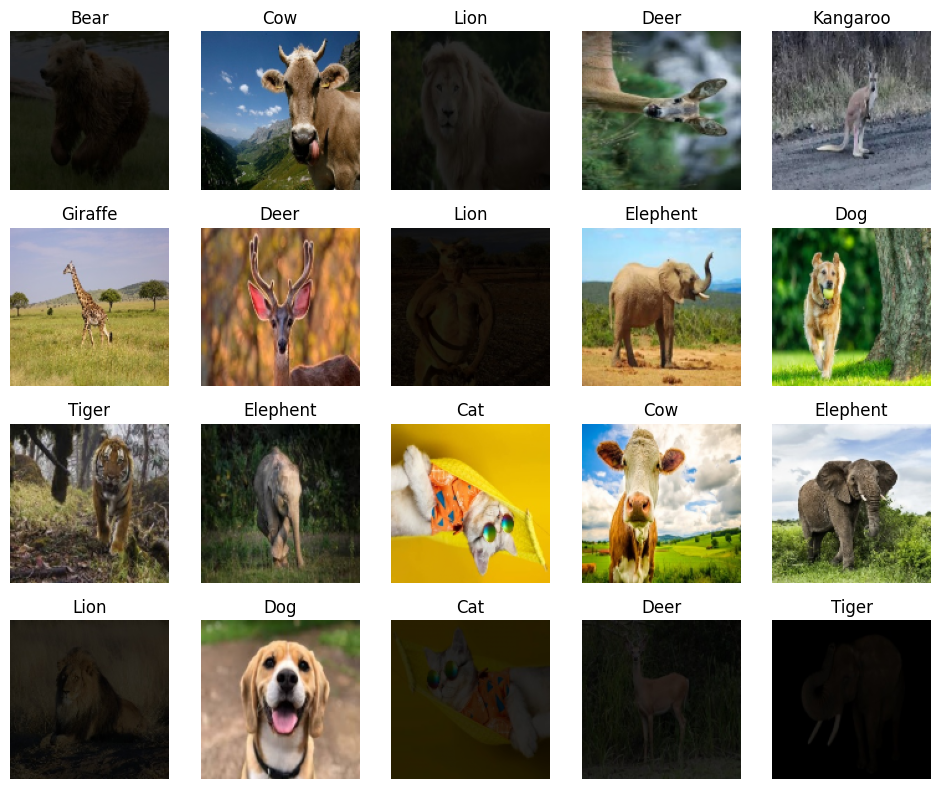

In [121]:
plt.figure(figsize=(10,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i] * 255)
    if final[i] == 0:
        plt.title('Bear')
    elif final[i] == 1:
        plt.title('Bird')
    elif final[i] == 2:
        plt.title('Cat')
    elif final[i] == 3:
        plt.title('Cow')
    elif final[i] == 4:
        plt.title('Deer')
    elif final[i] == 5:
        plt.title('Dog')
    elif final[i] == 6:  
        plt.title('Dolphin')
    elif final[i] == 7:
        plt.title('Elephent')
    elif final[i] == 8:
        plt.title('Giraffe')
    elif final[i] == 9:
        plt.title('Horse')
    elif final[i] == 10:
        plt.title('Kangaroo')
    elif final[i] == 11:
        plt.title('Lion')
    elif final[i] == 12:
        plt.title('Panda')
    elif final[i] == 13:  
        plt.title('Tiger')
    elif final[i] == 14:
        plt.title('Zebra')
    plt.axis('off')
    plt.tight_layout()

In [122]:
model.save('animal_class.h5')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

In [2]:
model = load_model('your_model.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'your_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {pred_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig("prediction_grid.png")
plt.show()

In [ ]:
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()